In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
africa = pd.read_csv("D://classification//africa-economic-banking-and-systemic-crisis-data//african_crises.csv")

In [3]:
africa.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [4]:
africa.isnull().sum()

case                               0
cc3                                0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

In [5]:
africa.country.value_counts()

Egypt                       155
South Africa                114
Zimbabwe                     90
Algeria                      85
Angola                       77
Tunisia                      75
Morocco                      75
Zambia                       72
Mauritius                    68
Kenya                        67
Ivory Coast                  63
Nigeria                      60
Central African Republic     58
Name: country, dtype: int64

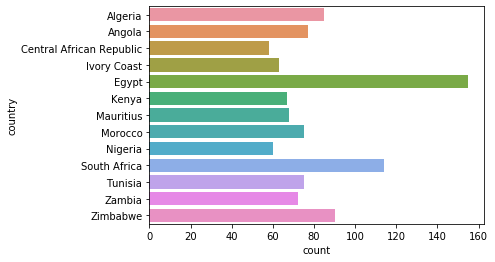

In [6]:
sns.countplot(y= africa.country)

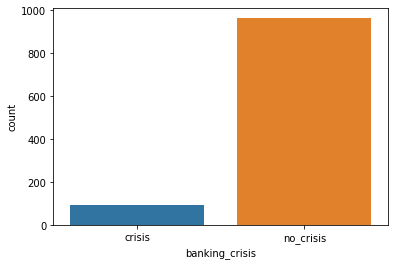

In [7]:
sns.countplot(africa.banking_crisis)

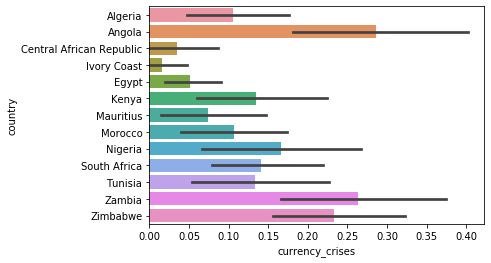

In [8]:
sns.barplot(y = "country" , x = "currency_crises",data = africa)

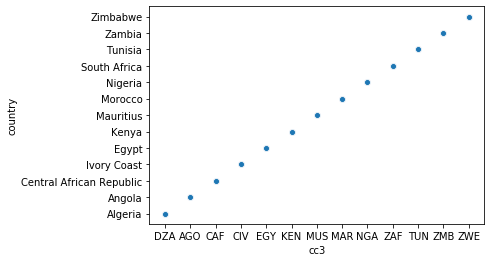

In [9]:
sns.scatterplot(x= "cc3" , y = "country",data = africa)

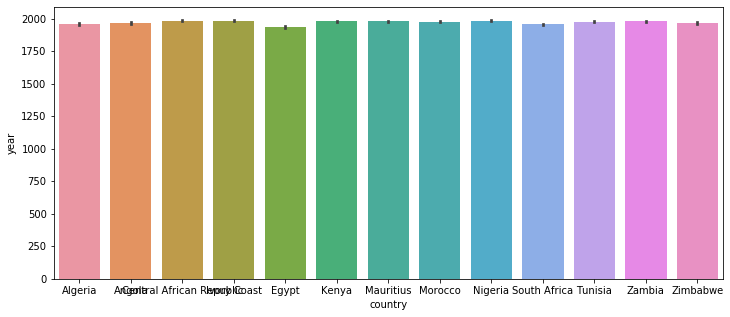

In [10]:
plt.figure(figsize=(12,5))
sns.barplot(x="country",y = "year",data=africa)

In [11]:
cri = africa[africa['banking_crisis']=="crisis"]

In [12]:
inflation = []
def inflation(inflation_annual_cpi):
    for i in range(len(africa.inflation_annual_cpi)):
        if max(inflation_annual_cpi) in i:
            inflation.append(i)
print(inflation)

<function inflation at 0x000000000AF44158>


In [13]:
africa[africa['country']=='Algeria']['inflation_annual_cpi'].max()

69.23076923

In [14]:
high = round(africa.groupby(['country'])['inflation_annual_cpi'].max())

In [15]:
high.drop(['Zimbabwe','Angola'],inplace = True)

In [16]:
index = np.arange(len(high))

In [17]:
index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

([<matplotlib.axis.XTick at 0xade81d0>,
 <a list of 11 Text xticklabel objects>)

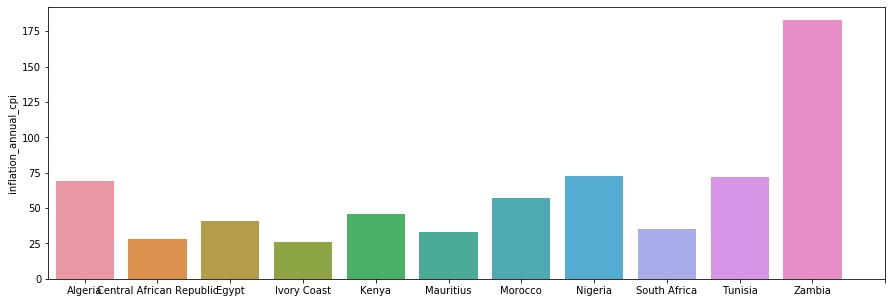

In [18]:
plt.figure(figsize=(15,5))
sns.barplot(index,high)
plt.xticks(np.arange(12),('Algeria',"Central African Republic","Egypt","Ivory Coast","Kenya","Mauritius","Morocco","Nigeria","South Africa","Tunisia","Zambia"))

In [19]:
print(high)

country
Algeria                      69.0
Central African Republic     28.0
Egypt                        41.0
Ivory Coast                  26.0
Kenya                        46.0
Mauritius                    33.0
Morocco                      57.0
Nigeria                      73.0
South Africa                 35.0
Tunisia                      72.0
Zambia                      183.0
Name: inflation_annual_cpi, dtype: float64


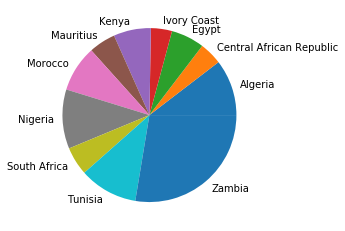

In [20]:
plt.pie(high,labels=['Algeria',"Central African Republic","Egypt","Ivory Coast","Kenya","Mauritius","Morocco","Nigeria","South Africa","Tunisia","Zambia"]);

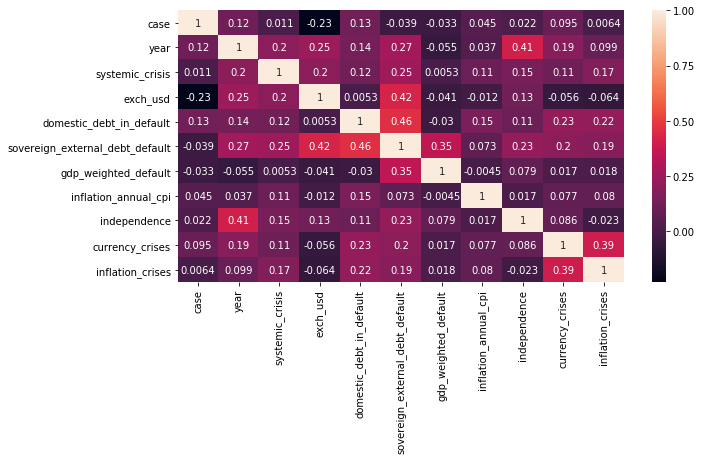

In [21]:
plt.figure(figsize=(10,5))
sns.heatmap(africa.corr(),annot = True)

In [45]:
#sns.pairplot(africa)

In [23]:
africa.case.unique()

array([ 1,  2, 10, 15, 19, 35, 38, 40, 45, 56, 63, 69, 70], dtype=int64)

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
la = LabelEncoder()

In [26]:
africa['banking_crisis'] = la.fit_transform(africa['banking_crisis'])

In [27]:
africa['banking_crisis'].unique()

array([0, 1], dtype=int64)

In [28]:
africa.describe()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000,1059.000000
mean,35.613787,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367,0.911237
std,23.692402,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765,0.284536
min,1.000000,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000,0.000000
25%,15.000000,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000,1.000000
50%,38.000000,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000,1.000000
75%,56.000000,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000,1.000000
max,70.000000,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000,1.000000


In [29]:
# applying the scaling technique

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
sc = StandardScaler()

In [49]:
newaf = africa.drop(["cc3","country"],axis = 1)

In [37]:
africa.cc3.value_counts()

EGY    155
ZAF    114
ZWE     90
DZA     85
AGO     77
MAR     75
TUN     75
ZMB     72
MUS     68
KEN     67
CIV     63
NGA     60
CAF     58
Name: cc3, dtype: int64

In [50]:
newaf.head()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,0
1,1,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,1
2,1,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,1
3,1,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,1
4,1,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,1


In [41]:
newaf.groupby(['country'])['domestic_debt_in_default'].max()

country
Algeria                     0
Angola                      1
Central African Republic    0
Egypt                       0
Ivory Coast                 0
Kenya                       0
Mauritius                   0
Morocco                     0
Nigeria                     0
South Africa                0
Tunisia                     0
Zambia                      0
Zimbabwe                    1
Name: domestic_debt_in_default, dtype: int64

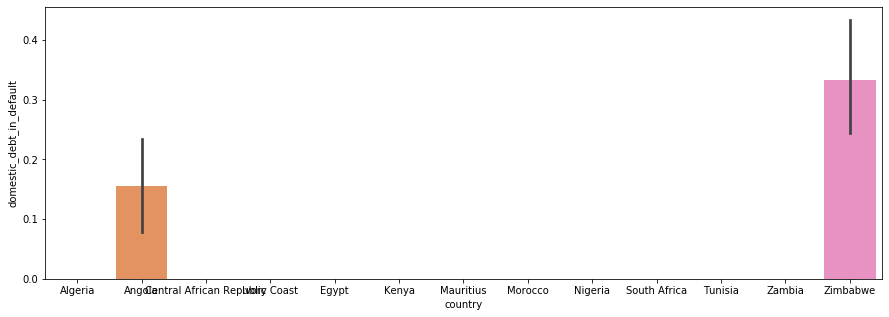

In [44]:
plt.figure(figsize=(15,5))
sns.barplot(y = "domestic_debt_in_default",x = "country",data = newaf)

In [46]:
# applying the smote technique

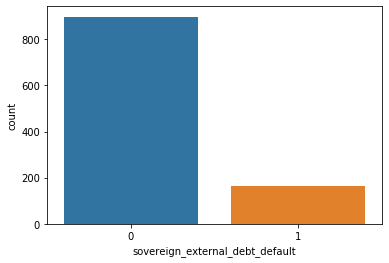

In [47]:
sns.countplot(newaf.sovereign_external_debt_default)

In [53]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [62]:
sm = SMOTE(random_state=100,

In [52]:
!pip install imblearn

In [63]:
x = newaf.drop("banking_crisis",axis = 1)
y = newaf['banking_crisis']

In [64]:
x_res,y_res = sm.fit_resample(x,y)

In [65]:
Counter(y_res)

Counter({0: 965, 1: 965})

In [66]:
x_res

array([[1.00000000e+00, 1.87000000e+03, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.87100000e+03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.87200000e+03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.50000000e+01, 2.01180299e+03, 1.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.50000000e+01, 2.01253855e+03, 1.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.93048777e+00, 1.88331999e+03, 1.00000000e+00, ...,
        2.18360432e-01, 0.00000000e+00, 0.00000000e+00]])

<Figure size 3600x3600 with 0 Axes>

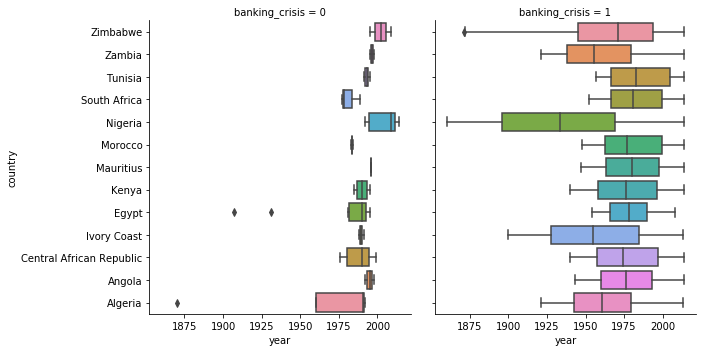

In [100]:
plt.figure(figsize=(50,50))
sns.catplot(x ="year",y = "country",data = africa, col="banking_crisis",kind="box")

<Figure size 3600x3600 with 0 Axes>

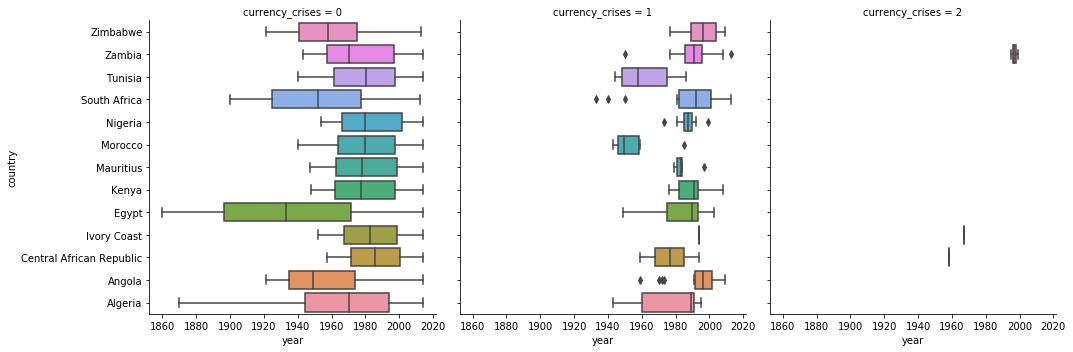

In [112]:
plt.figure(figsize=(50,50))
sns.catplot(x ="year",y = "country",data = africa, col="currency_crises",kind="box")

In [110]:
africa.currency_crises.unique()

array([0, 1, 2], dtype=int64)

In [113]:
from sklearn.preprocessing import StandardScaler

In [114]:
sc = StandardScaler()

In [119]:
x = pd.DataFrame(sc.fit_transform(newaf.drop("banking_crisis",axis=1)))

In [120]:
y = newaf.banking_crisis

In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [122]:
dtree = DecisionTreeClassifier()

In [124]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.30 ,random_state = 100)

In [125]:
model = dtree.fit(xtrain,ytrain)

In [126]:
pre = model.predict(xtest)

In [127]:
pre

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [128]:
xtrain,xtest,ytrain,ytest = train_test_split(x_res,y_res,test_size = 0.30 , random_state = 100)

In [129]:
from sklearn.ensemble import RandomForestClassifier

In [130]:
rf = RandomForestClassifier()

In [131]:
modal = rf.fit(xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [133]:
predict = modal.predict(xtest)

In [134]:
predict

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,

In [139]:
from sklearn.metrics import accuracy_score,classification_report,cohen_kappa_score

In [136]:
accuracy_score(ytest,predict)

0.9948186528497409

In [138]:
classification_report(ytest,predict)

'              precision    recall  f1-score   support\n\n           0       1.00      0.99      0.99       283\n           1       0.99      1.00      0.99       296\n\n    accuracy                           0.99       579\n   macro avg       0.99      0.99      0.99       579\nweighted avg       0.99      0.99      0.99       579\n'

In [140]:
cohen_kappa_score(ytest,predict)

0.9896312745115596

In [142]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [153]:
features = "+".join(newaf.drop("banking_crisis",axis = 1))

In [155]:
from patsy import dmatrices
y, X = dmatrices('banking_crisis ~' + features, newaf, return_type='dataframe')

In [156]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [157]:
vif.round(1)

,VIF Factor,features
0,4612.4,Intercept
1,1.1,case
2,1.4,year
3,1.1,systemic_crisis
4,1.6,exch_usd
5,1.5,domestic_debt_in_default
6,2.3,sovereign_external_debt_default
7,1.3,gdp_weighted_default
8,1.0,inflation_annual_cpi
9,1.2,independence


In [158]:
from patsy import dmatrices

In [159]:
vif = pd.DataFrame()
vif['vif factor'] = [variance_inflation_factor(X.values,i)for i in range(X.shape[1])]

In [160]:
vif['features'] = X.columns

In [161]:
vif

,vif factor,features
0,4612.400912,Intercept
1,1.117499,case
2,1.384355,year
3,1.137217,systemic_crisis
4,1.584122,exch_usd
5,1.540899,domestic_debt_in_default
6,2.332896,sovereign_external_debt_default
7,1.342703,gdp_weighted_default
8,1.035167,inflation_annual_cpi
9,1.245767,independence
